# 用户指南，第3章：音高，时值与音符
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_03_pitches.html)

上一章中介绍了`Note`对象。本章更深入地探索构成Note的各个属性，包括`music21.pitch`和`music21.duration`

## 音高对象`Pitch`

正如`Note`对象在`note`模块中定义，`Pitch`对象在`pitch`模块中定义.

我们来创建一个`Pitch`对象。就像创建`Note`对象一样，输入音名即可，例如`B`，带有或不带有变调符号（`#`或`-`）

在音名后，可以带有或不带有八度号

In [1]:
from music21 import *
p1 = pitch.Pitch('b-4')

这里使用一个更精简的变量名，`p1`，以便接下来改变（例如通过`.transpose()`）。

和`Note`一样，`Pitch`也拥有很多属性和方法。先介绍三个`Note`也有的属性。

In [2]:
p1.octave

4

In [3]:
p1.pitchClass

10

In [4]:
p1.name

'B-'

In [5]:
p1.accidental.alter

-1.0

以下两个属性是pitch特有的。第一个是`nameWithOctave`，顾名思义，它是带有八度号的完整音名。第二个是`midi`，是一种旧的，但现在仍在使用的表示法。它是1到127之间的一个整数，中央C（C4）为60，C#4/D-4为61，B3为59，依此类推。

In [6]:
p1.nameWithOctave

'B-4'

In [7]:
p1.midi

70

大部分属性可修改（在python中，称为"settable properties"）

当修改一个属性后，`Pitch`对象就改变为新属性所定义的音高：

In [8]:
p1.name = 'd#'
p1.octave = 3
p1.nameWithOctave

'D#3'

`Pitch`也支持`.transpose()`方法。记得`p1`现在是`D#`

In [9]:
p2 = p1.transpose('M7')
p2

<music21.pitch.Pitch C##4>

注意在命令行上，输入变量名即可显示`<music21.pitch.Pitch C##4>`。也可以用`repr(p2)`来显示

所以，貌似`Pitch`对象跟`Notes`相比，好像也没啥新东西的样子，那为什么要两个不同的对象呢？因为，它们之所以这么像，是因为每个`Note`对象都含有一个`Pitch`对象。我们对`note.Note`所做的每个操作，都可以在`note.Note.pitch`上面做

In [10]:
csharp = note.Note('C#4')
csharp.name

'C#'

In [11]:
csharp.pitch.name

'C#'

In [12]:
csharp.octave

4

In [13]:
csharp.pitch.octave

4

但是`Pitch`提供了更多功能用于技术工作。例如，`Pitch`知道它在西班牙语中的名字`

In [14]:
csharp.pitch.spanish

'do sostenido'

而音符不支持

In [15]:
csharp.spanish

AttributeError: 'Note' object has no attribute 'spanish'

`Pitch`对象还支持更多操作。例如，在unicode中正确地显示升调符号

In [16]:
print(csharp.pitch.unicodeName)

C♯


获得等音

In [17]:
print( csharp.pitch.getEnharmonic() )
print( csharp.pitch.getLowerEnharmonic() )

D-4
B##3


顺便提一下，既然不能有一个叫`pitch`的变量，你可能会想为什么`Note`对象可以有一个叫`pitch`的属性呢？这是因为`.pitch`属性总是属于一个`Note`对象，而不属于主命名空间。

到目前为止，`Note`能做的事情`Pitch`都能做，那么我们为什么还需要`Note`对象呢？这是因为`Note`还有时值`Duration`属性。如果没有`Duration`属性，就不可能把对象放到你的一个小节中，或者显示在屏幕上

## 用`Duration`对象处理时值
音乐中的一个音符需要持续一定量的时间，我们叫它时值`Duration`。`Duration`对象在music21中普遍存在。几乎所有的对象都有，或者可以有`Duration`。`Duration`对象可以表示各种时间段。

`Duration`对象一般在其他对象中使用，如`Note`和`Rest`。但这里我们看看`Duration`单独使用能做什么

`Duration`对象属于`duration`模块。创建`Duration`对象时，可指定这个时值的类型。

下面创建一个半音符`Duration`

In [18]:
halfDuration = duration.Duration('half')

music对象使用常用的美式时值类型：`"whole"`、`"half"`、`"quarter"`、`"eighth"`、`"16th"`、`"32nd"`、`"64th"`。注意：比八分音符更短的音符，我们使用数字而不是拼写全称。music21也支持更长的时值，例如`"breve"`（两个全音符）、`"longa"`（4个全音符）和`"maxima"`（8个全音符），以及更短的时值，例如`"128th"`、`"256th"`，一直到`"2048th"`。（许多符号音乐表示系统中，非常长和非常短的音符不能显示，但是当他们支持的时候，我们就支持）。

另一个创建`Duration`对象的标准方法是输入四分音符的数量。例如对于半音符，我们可以输入`2`或`2.0`。我们也可以输入不是2的整数幂的数值，例如1.5倍四分音符长度的附点四分音符

In [19]:
dottedQuarter = duration.Duration(1.5)

就像`Pitch`和`Note`一样，`Duration`也有很多属性。最重要的是`quaterLength`。例如，`dottedQuarter`的`quaterLength`是1.5。` halfDuration`同样也有`quaterLength`属性。

In [20]:
dottedQuarter.quarterLength

1.5

In [21]:
halfDuration.quarterLength

2.0

`.type`属性告诉你时值的类型

In [22]:
halfDuration.type

'half'

In [23]:
dottedQuarter.type

'quarter'

`type`不能作为描述`Duration`的唯一属性。music21还记录了`dottedQuarter`变量的其他属性，以确定它有一个附点。这个属性叫`dots`

In [24]:
halfDuration.dots

0

In [25]:
dottedQuarter.dots

1

`dots`，`type`和` quarterLength`实际上是一种叫做“特征属性”（property）的特殊属性，它们在某些方面“智能”。例如我们修改`dottedQuarter.dots`看看会发生什么：

In [26]:
dottedQuarter.dots = 2
dottedQuarter.quarterLength

1.75

In [27]:
dottedQuarter.dots = 3
dottedQuarter.quarterLength

1.875

In [28]:
dottedQuarter.dots = 4
dottedQuarter.quarterLength

1.9375

改变`dottedQuarter`的`quarterLength`，看看`type`和`dots`会发生什么：

In [29]:
dottedQuarter.quarterLength = 0.25
dottedQuarter.type

'16th'

In [30]:
dottedQuarter.dots

0

Music21也可以处理其他的`quarterLengths`，例如0.8（四分音符的4/5）、1/3（八分三连音）。(For this reason, users compiling spreadsheets or other text-based output should expect to find the occasional quarterLength expressed as a Fraction.)

(You can go ahead and make a triplet or other Tuplet, but we’ll get to triplets, including tips for manipulating a Fraction in Chapter 19).
## 回到音符
现在你看到了使用`Note`对象的好处：它兼有音高和时值信息。`Note`的默认音高是`C4`，默认时值是1.0（四分音符）。

In [31]:
n1 = note.Note()
n1.pitch

<music21.pitch.Pitch C4>

In [32]:
n1.duration

<music21.duration.Duration 1.0>

我们可以修改这些属性

In [33]:
n1.pitch.nameWithOctave = 'E-5'
n1.duration.quarterLength = 3.0

其他属性将会跟着变

In [34]:
n1.duration.type

'half'

In [35]:
n1.duration.dots

1

In [36]:
n1.pitch.name

'E-'

In [37]:
n1.pitch.accidental

<music21.pitch.Accidental flat>

In [38]:
n1.octave

5

刚才说了，`Note`对象支持`Pitch`的部分属性。`Note`同样支持`Duration`对象的最重要的属性：

In [39]:
n1.name

'E-'

In [40]:
n1.quarterLength

3.0

把`quarterLength`改回1.0

In [41]:
n1.quarterLength = 1.0

`Notes`可以做`Pitch`和`Duration`做不了的事情。例如，`Notes`可以拥有歌词。

In [42]:
otherNote = note.Note("F6")
otherNote.lyric = "I'm the Queen of the Night!"

但是我们来做一些更复杂的事情。这里我们使用`addLyric`，把音符的音高属性作为歌词添加给`n1`

In [43]:
n1.addLyric(n1.nameWithOctave)
n1.addLyric(n1.pitch.pitchClassString)

再加一个时值

In [44]:
n1.addLyric(f'QL: {n1.quarterLength}')

字符串`f'QL: {n1.quarterLength}’ `的前缀`f`表示将花括号`{}`中的变量名替换为值。（记住`.quarterLength`不是字符串，而是浮点数）

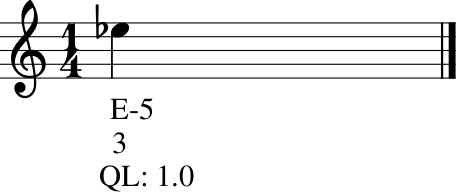

In [45]:
n1.show()

如果我们编辑`quarterLength`属性，我们仍然可以修改音符的时值，但歌词中的"QL: 1.0"不会改变

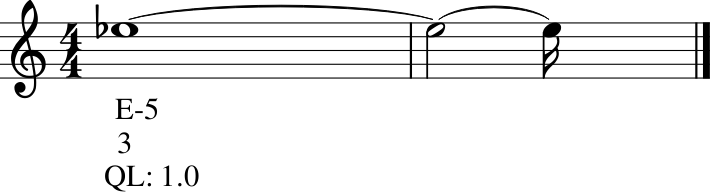

In [46]:
n1.quarterLength = 6.25
n1.show()

`Note`对象还有更多的用法，但我们接下来介绍多个音符放在一起会发生什么。

[用户指南，第4章：列表，流(I)与输出](4.ipynb)